# Week 5 - Deep Learning Lab

Author: Khushee Kapoor

Registration Number: 200968052

Last Updated: 24/8/22

## Setting Up

To begin, we import the following libraries:

- NumPy: for data manipulation
- Pandas: for data manipulation
- Matplotlib: for data visualization
- Seaborn: for data visualization
- Tensorflow: to build neural networks

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

Next, we fetch the data using the fetch_california_housing() function from the sklearn library. After that, we split the independent variables (x) and dependent variable (y) using the 'data' and 'target' keys in the data dictionary.

In [2]:
# fetching the data
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing()

# splitting the independent and dependent variables
x = df['data']
y = df['target']

Next, we split x and y variables into training and testing sets using the train_test_split() function from the sklearn library and fixing the random state for consistent results.

In [3]:
# splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.85, random_state=101)

## Sequential API

Now, we build our sequential model using the Sequential API from the sklearn library. We add one hidden layer with 30 units and activation function 'relu'. Then we add the output layer with 1 unit and activation function 'linear' for linear regression. We also add a Batch Normalization layer at the very start to optimize the model.

In [4]:
# building the network
sequential = tf.keras.Sequential()
sequential.add(tf.keras.layers.Input(shape=[8]))
sequential.add(tf.keras.layers.BatchNormalization())
sequential.add(tf.keras.layers.Dense(30, activation='relu'))
sequential.add(tf.keras.layers.Dense(1, activation='linear'))

# printing the network summary
sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 8)                32        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 333
Trainable params: 317
Non-trainable params: 16
_________________________________________________________________


As we can see, there are 333 parameters out of which 317 are trainable and 16 are non trainable.

To obtain a pictorial representation of the network, we use the plot_model() function from the Tensorflow library.

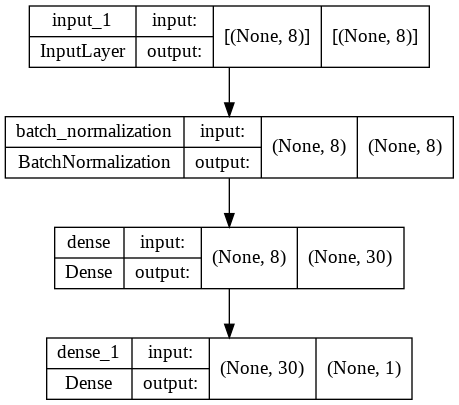

In [5]:
# obtaining a pictorial representation of the network
from tensorflow.keras.utils import plot_model
plot_model(sequential,  show_shapes=True, show_layer_names=True)

Next compile the model and set the optimizer to be 'adam', loss to be MeanSquaredError and metric to be RootMeanSquaredError. After that, we train the model on the training data with number of epochs set to 20 and validation split to be 12.75%.

In [6]:
# compiling the model
sequential.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])

# training the model
hist = sequential.fit(x_train, y_train, batch_size=32, epochs=20, validation_split=0.1275)

Epoch 1/20
479/479 [==============================] - 3s 4ms/step - loss: 1.1868 - root_mean_squared_error: 1.0894 - val_loss: 0.5794 - val_root_mean_squared_error: 0.7612
Epoch 2/20
479/479 [==============================] - 2s 4ms/step - loss: 0.4698 - root_mean_squared_error: 0.6854 - val_loss: 0.5152 - val_root_mean_squared_error: 0.7178
Epoch 3/20
479/479 [==============================] - 3s 6ms/step - loss: 0.4441 - root_mean_squared_error: 0.6664 - val_loss: 0.5174 - val_root_mean_squared_error: 0.7193
Epoch 4/20
479/479 [==============================] - 3s 6ms/step - loss: 0.4308 - root_mean_squared_error: 0.6564 - val_loss: 0.4729 - val_root_mean_squared_error: 0.6877
Epoch 5/20
479/479 [==============================] - 3s 6ms/step - loss: 0.4302 - root_mean_squared_error: 0.6559 - val_loss: 0.4677 - val_root_mean_squared_error: 0.6839
Epoch 6/20
479/479 [==============================] - 3s 6ms/step - loss: 0.4284 - root_mean_squared_error: 0.6545 - val_loss: 0.4704 - val_

We then compare the training and validation losses (mse). To do this, we use the history attribute and extract the losses (mse) of the models. Next, we plot it against the number of epochs using functions from the MatPlotLib library.

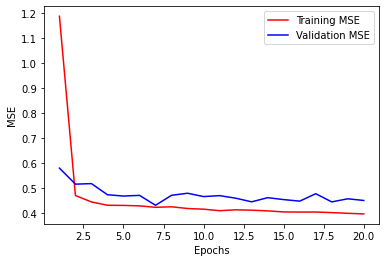

In [7]:
# extracting the model loss against epochs
tl = hist.history['loss']
vl = hist.history['val_loss']
eps = range(1, 21)

# plotting the train and validation loss
plt.plot(eps, tl, 'r', label='Training MSE')
plt.plot(eps, vl, 'b', label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

As we can see, the loss, that is the mean squared error decreases sharply and then plateaus in the case of training, and remains more or loss constant with some fluctuations in the case of validation. There is some difference between the two.

Next, we compare the training and validation rmse. To do this, we use the history attribute and extract the rmse of the models. Next, we plot it against the number of epochs using functions from the MatPlotLib library.

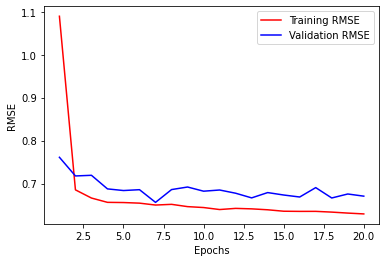

In [8]:
# extracting the model rmse against epochs
ta = hist.history['root_mean_squared_error']
va = hist.history['val_root_mean_squared_error']
eps = range(1, 21)

# plotting the train and validation rmse
plt.plot(eps, ta, 'r', label='Training RMSE')
plt.plot(eps, va, 'b', label='Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

As we can see the rmse decreases sharply and then plateaus in the case of training, and remains more or loss constant with some fluctuations in the case of validation. There is some difference between the two.

To evaluate the model accuracy, we first obtain predictions on the test set using the predict() function. Then, we calculate the root mean squared error using the sqrt() function from the numpy library and the mean_squared_error() function from the sklearn library. To easily interpret the rmse, we calculate the percentage variation by dividing the rmse by the mean of the true values.

In [9]:
# obtaining the predictions
predictions = sequential.predict(x_test)

# calculating the rmse
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(str.format('Overall RMSE: {:.2f}', rmse))

# calculating the variation
variation = rmse/np.mean(y_test)*100
print(str.format('Variation: {:.2f}%', variation))

Overall RMSE: 0.70
Variation: 33.51%


As we can see, the rmse is 0.70, which means that it the error is around 33.51% from the mean value. This means that the model performs moderately.

## Functional API

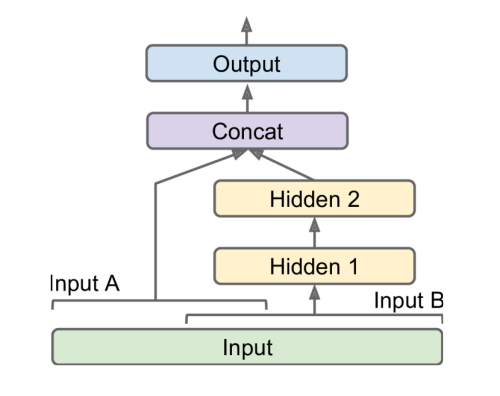

We build the above model using the functional API. To do that, we follow the steps:

- create two input layers using the Input() function from the keras library
- link both the input layers to batch normalization layers to normalize the data in turn optimizing the model
- link the second normalized input layer to two consecutive hidden layers having 30 neurons each and activation function 'relu'
- concatenate the first normalized input layer with the second hidden layer using the Concatenate() function from the keras library
- link the merged layer with an output layer having one neuron and activation function 'linear' (since this is a regression model)
- connect all the layers together using the Model() function from the keras library

In [10]:
# creating input layer 1 and normalizing
inputA = tf.keras.layers.Input(shape=[5], name='inputA')
normalizeA = tf.keras.layers.BatchNormalization()(inputA)

# creating input layer 2 and normalizing
inputB = tf.keras.layers.Input(shape=[6], name='inputB')
normalizeB = tf.keras.layers.BatchNormalization()(inputB)

# linking normalized input layer 2 to a deep network
hidden1 = tf.keras.layers.Dense(30, activation='relu', name='hidden1')(normalizeB)
hidden2 = tf.keras.layers.Dense(30, activation='relu', name='hidden2')(hidden1)

# merging normalized input layer 1 and the hidden layer 2
concat = tf.keras.layers.Concatenate(name='concat')([hidden2, normalizeA])

# linking the merged layer to the output layer
output = tf.keras.layers.Dense(1, activation='linear', name='output')(concat)

# connecting all the layers in the model
functional = tf.keras.models.Model(inputs=[inputA, inputB], outputs=output)

# printing the network summary
functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputB (InputLayer)            [(None, 6)]          0           []                               
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 6)           24          ['inputB[0][0]']                 
 rmalization)                                                                                     
                                                                                                  
 hidden1 (Dense)                (None, 30)           210         ['batch_normalization_2[0][0]']  
                                                                                                  
 inputA (InputLayer)            [(None, 5)]          0           []                           

As we can see, there are 1220 parameters out of which 1198 are trainable and 22 are non trainable.

To obtain a pictorial representation of the network, we use the plot_model() function from the Tensorflow library.

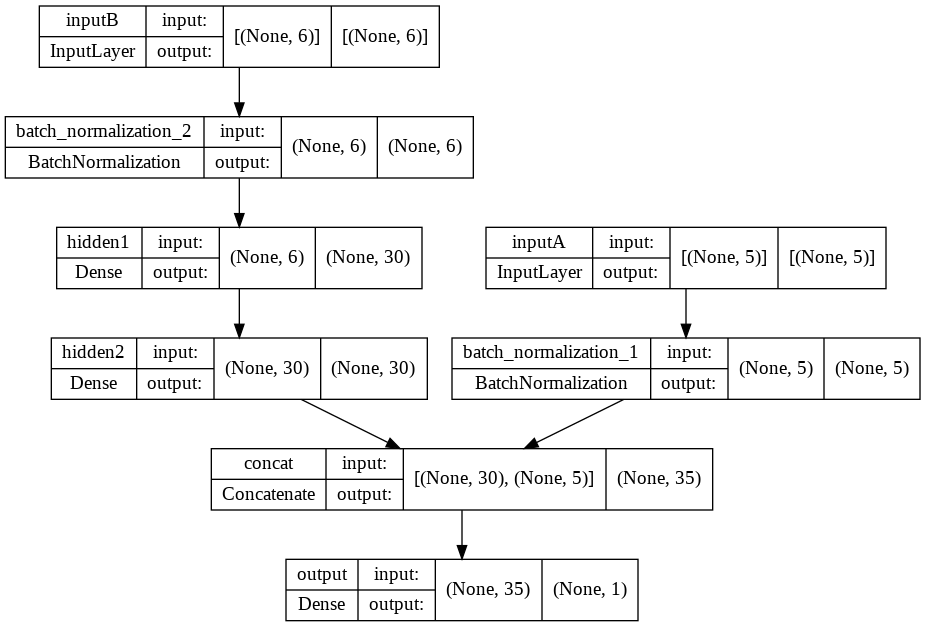

In [11]:
# obtaining a pictorial representation of the network
from tensorflow.keras.utils import plot_model
plot_model(functional,  show_shapes=True, show_layer_names=True)

Next compile the model and set the optimizer to be 'adam', loss to be MeanSquaredError and metric to be RootMeanSquaredError.

In [12]:
# compiling the network
functional.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])

We then create features sets by passing features 0 to 4 in the first set and features 2 to 7 in the second set.

In [13]:
# creating feature sets
inputA = x_train[:, :5]
inputB = x_train[:, 2:]

After that, we train the model on the training data with number of epochs set to 20 and validation split to be 12.75%.

In [14]:
# training the network
hist = functional.fit([inputA, inputB], y_train, epochs=20, batch_size=32, validation_split=0.1275)

Epoch 1/20
479/479 [==============================] - 3s 4ms/step - loss: 0.8455 - root_mean_squared_error: 0.9195 - val_loss: 0.5767 - val_root_mean_squared_error: 0.7594
Epoch 2/20
479/479 [==============================] - 2s 4ms/step - loss: 0.4659 - root_mean_squared_error: 0.6826 - val_loss: 0.5201 - val_root_mean_squared_error: 0.7212
Epoch 3/20
479/479 [==============================] - 2s 4ms/step - loss: 0.4512 - root_mean_squared_error: 0.6717 - val_loss: 0.5007 - val_root_mean_squared_error: 0.7076
Epoch 4/20
479/479 [==============================] - 2s 4ms/step - loss: 0.4586 - root_mean_squared_error: 0.6772 - val_loss: 0.5165 - val_root_mean_squared_error: 0.7187
Epoch 5/20
479/479 [==============================] - 2s 4ms/step - loss: 0.4487 - root_mean_squared_error: 0.6699 - val_loss: 0.5090 - val_root_mean_squared_error: 0.7134
Epoch 6/20
479/479 [==============================] - 2s 4ms/step - loss: 0.4369 - root_mean_squared_error: 0.6610 - val_loss: 0.4758 - val_

We then compare the training and validation losses (mse). To do this, we use the history attribute and extract the losses (mse) of the models. Next, we plot it against the number of epochs using functions from the MatPlotLib library.

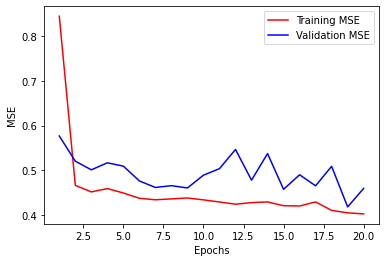

In [15]:
# extracting the model loss against epochs
tl = hist.history['loss']
vl = hist.history['val_loss']
eps = range(1, 21)

# plotting the train and validation loss
plt.plot(eps, tl, 'r', label='Training MSE')
plt.plot(eps, vl, 'b', label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

As we can see, the training mse decreases sharply and then plateaus, whereas the validation mse fluctuates. There is some difference between the two.

Next, we compare the training and validation rmse. To do this, we use the history attribute and extract the rmse of the models. Next, we plot it against the number of epochs using functions from the MatPlotLib library.

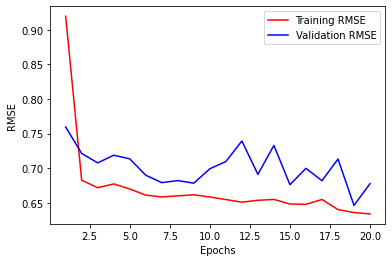

In [16]:
# extracting the model rmse against epochs
ta = hist.history['root_mean_squared_error']
va = hist.history['val_root_mean_squared_error']
eps = range(1, 21)

# plotting the train and validation rmse
plt.plot(eps, ta, 'r', label='Training RMSE')
plt.plot(eps, va, 'b', label='Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

As we can see, the training rmse decreases sharply and then plateaus, whereas the validation rmse fluctuates. There is some difference between the two.

To evaluate the model accuracy, we first obtain predictions on the test set using the predict() function. Then, we calculate the root mean squared error using the sqrt() function from the numpy library and the mean_squared_error() function from the sklearn library. To easily interpret the rmse, we calculate the percentage variation by dividing the rmse by the mean of the true values.

In [17]:
# obtaining the predictions
predictions = functional.predict([x_test[:, :5], x_test[:, 2:]])

# calculating the rmse
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(str.format('Overall RMSE: {:.2f}', rmse))

# calculating the variation
variation = rmse/np.mean(y_test)*100
print(str.format('Variation: {:.2f}%', variation))

Overall RMSE: 0.75
Variation: 35.73%


As we can see, the rmse is 0.75, which means that it the error is around 35.73% from the mean value. This means that the model performs moderately.